### Emotion Analyses On text Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

#### Construct the emotion dictionnary for each word in the English Vocabulary

In [2]:
nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
count=0
emotion_dict=dict()
with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count+=1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]

In [4]:
emotion_dict

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

#### Define a function that outputs the emotions for a specific text

In [3]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y} 
    #list comprehension - emotion for (emotion_list in emotion_dict.values() for emotion in emotion_list
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/total_words
    # Keys: Sadness, Joy, Surprise, Anticipation, Fear, Negative, Anger, Trust, Positive, Disgust
    return list(emotion_count.values())

#### Read the files and apply this function for each Category

In [8]:
dir_ = 'C://users/antoi/desktop/data_UN/EMM' 
files = os.listdir(dir_)
#files.remove('Sentiment_analyses_coreNLP.ipynb')
#files.remove('NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt')
#files.remove('.ipynb_checkpoints')
files.remove('EMM Sample.csv')
files.remove('EMM_1week_save1.csv')
#files.remove('Emotions_analyses.ipynb')

In [9]:
files

['EMM_1week.csv',
 'EMM_1week_Drought.csv',
 'EMM_1week_Ecology.csv',
 'EMM_1week_Genocide.csv',
 'EMM_1week_HumanitarianAid.csv',
 'EMM_1week_ManMadeDisasters.csv',
 'EMM_1week_NaturalDisasters.csv',
 'EMM_1week_PoliticalUnrest.csv',
 'EMM_1week_ScienceandTechnology.csv',
 'EMM_1week_Security.csv',
 'EMM_1week_Society.csv',
 'EMM_1week_TerroristAttack.csv',
 'EMM_1week_WaterConflict.csv']

#### Loop over the list of files and display boxplots

In [27]:
panel = []
for file in files:
    print('Process File:',file,'FileNB=',files.index(file))
    if file=='EMM_1week.csv':
        Category='Conflict'
        df=pd.read_csv(dir_+'/'+file).iloc[:1000]
    else:
        Category=file.split('_')[-1].split('.')[0]
        df=pd.read_csv(dir_+'/'+file)
    df[['Sadness', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Neg', 'Anger', 'Trust', 'Positive', 'Disgust']] = df.apply(lambda x: emotion_analyzer(x['Translated Description'],emotion_dict=emotion_dict),
                                                                                                   axis = 1, result_type = 'expand')
    df.drop(['Positive', 'Neg'], axis=1, inplace = True)
    #Sadness, Joy, Surprise, Anticipation, Fear, Negative, Anger, Trust, Positive, Disgust
    panel.append([Category, df])

Process File: EMM_1week.csv FileNB= 0
Process File: EMM_1week_Drought.csv FileNB= 1
Process File: EMM_1week_Ecology.csv FileNB= 2
Process File: EMM_1week_Genocide.csv FileNB= 3
Process File: EMM_1week_HumanitarianAid.csv FileNB= 4
Process File: EMM_1week_ManMadeDisasters.csv FileNB= 5
Process File: EMM_1week_NaturalDisasters.csv FileNB= 6
Process File: EMM_1week_PoliticalUnrest.csv FileNB= 7
Process File: EMM_1week_ScienceandTechnology.csv FileNB= 8
Process File: EMM_1week_Security.csv FileNB= 9
Process File: EMM_1week_Society.csv FileNB= 10
Process File: EMM_1week_TerroristAttack.csv FileNB= 11
Process File: EMM_1week_WaterConflict.csv FileNB= 12


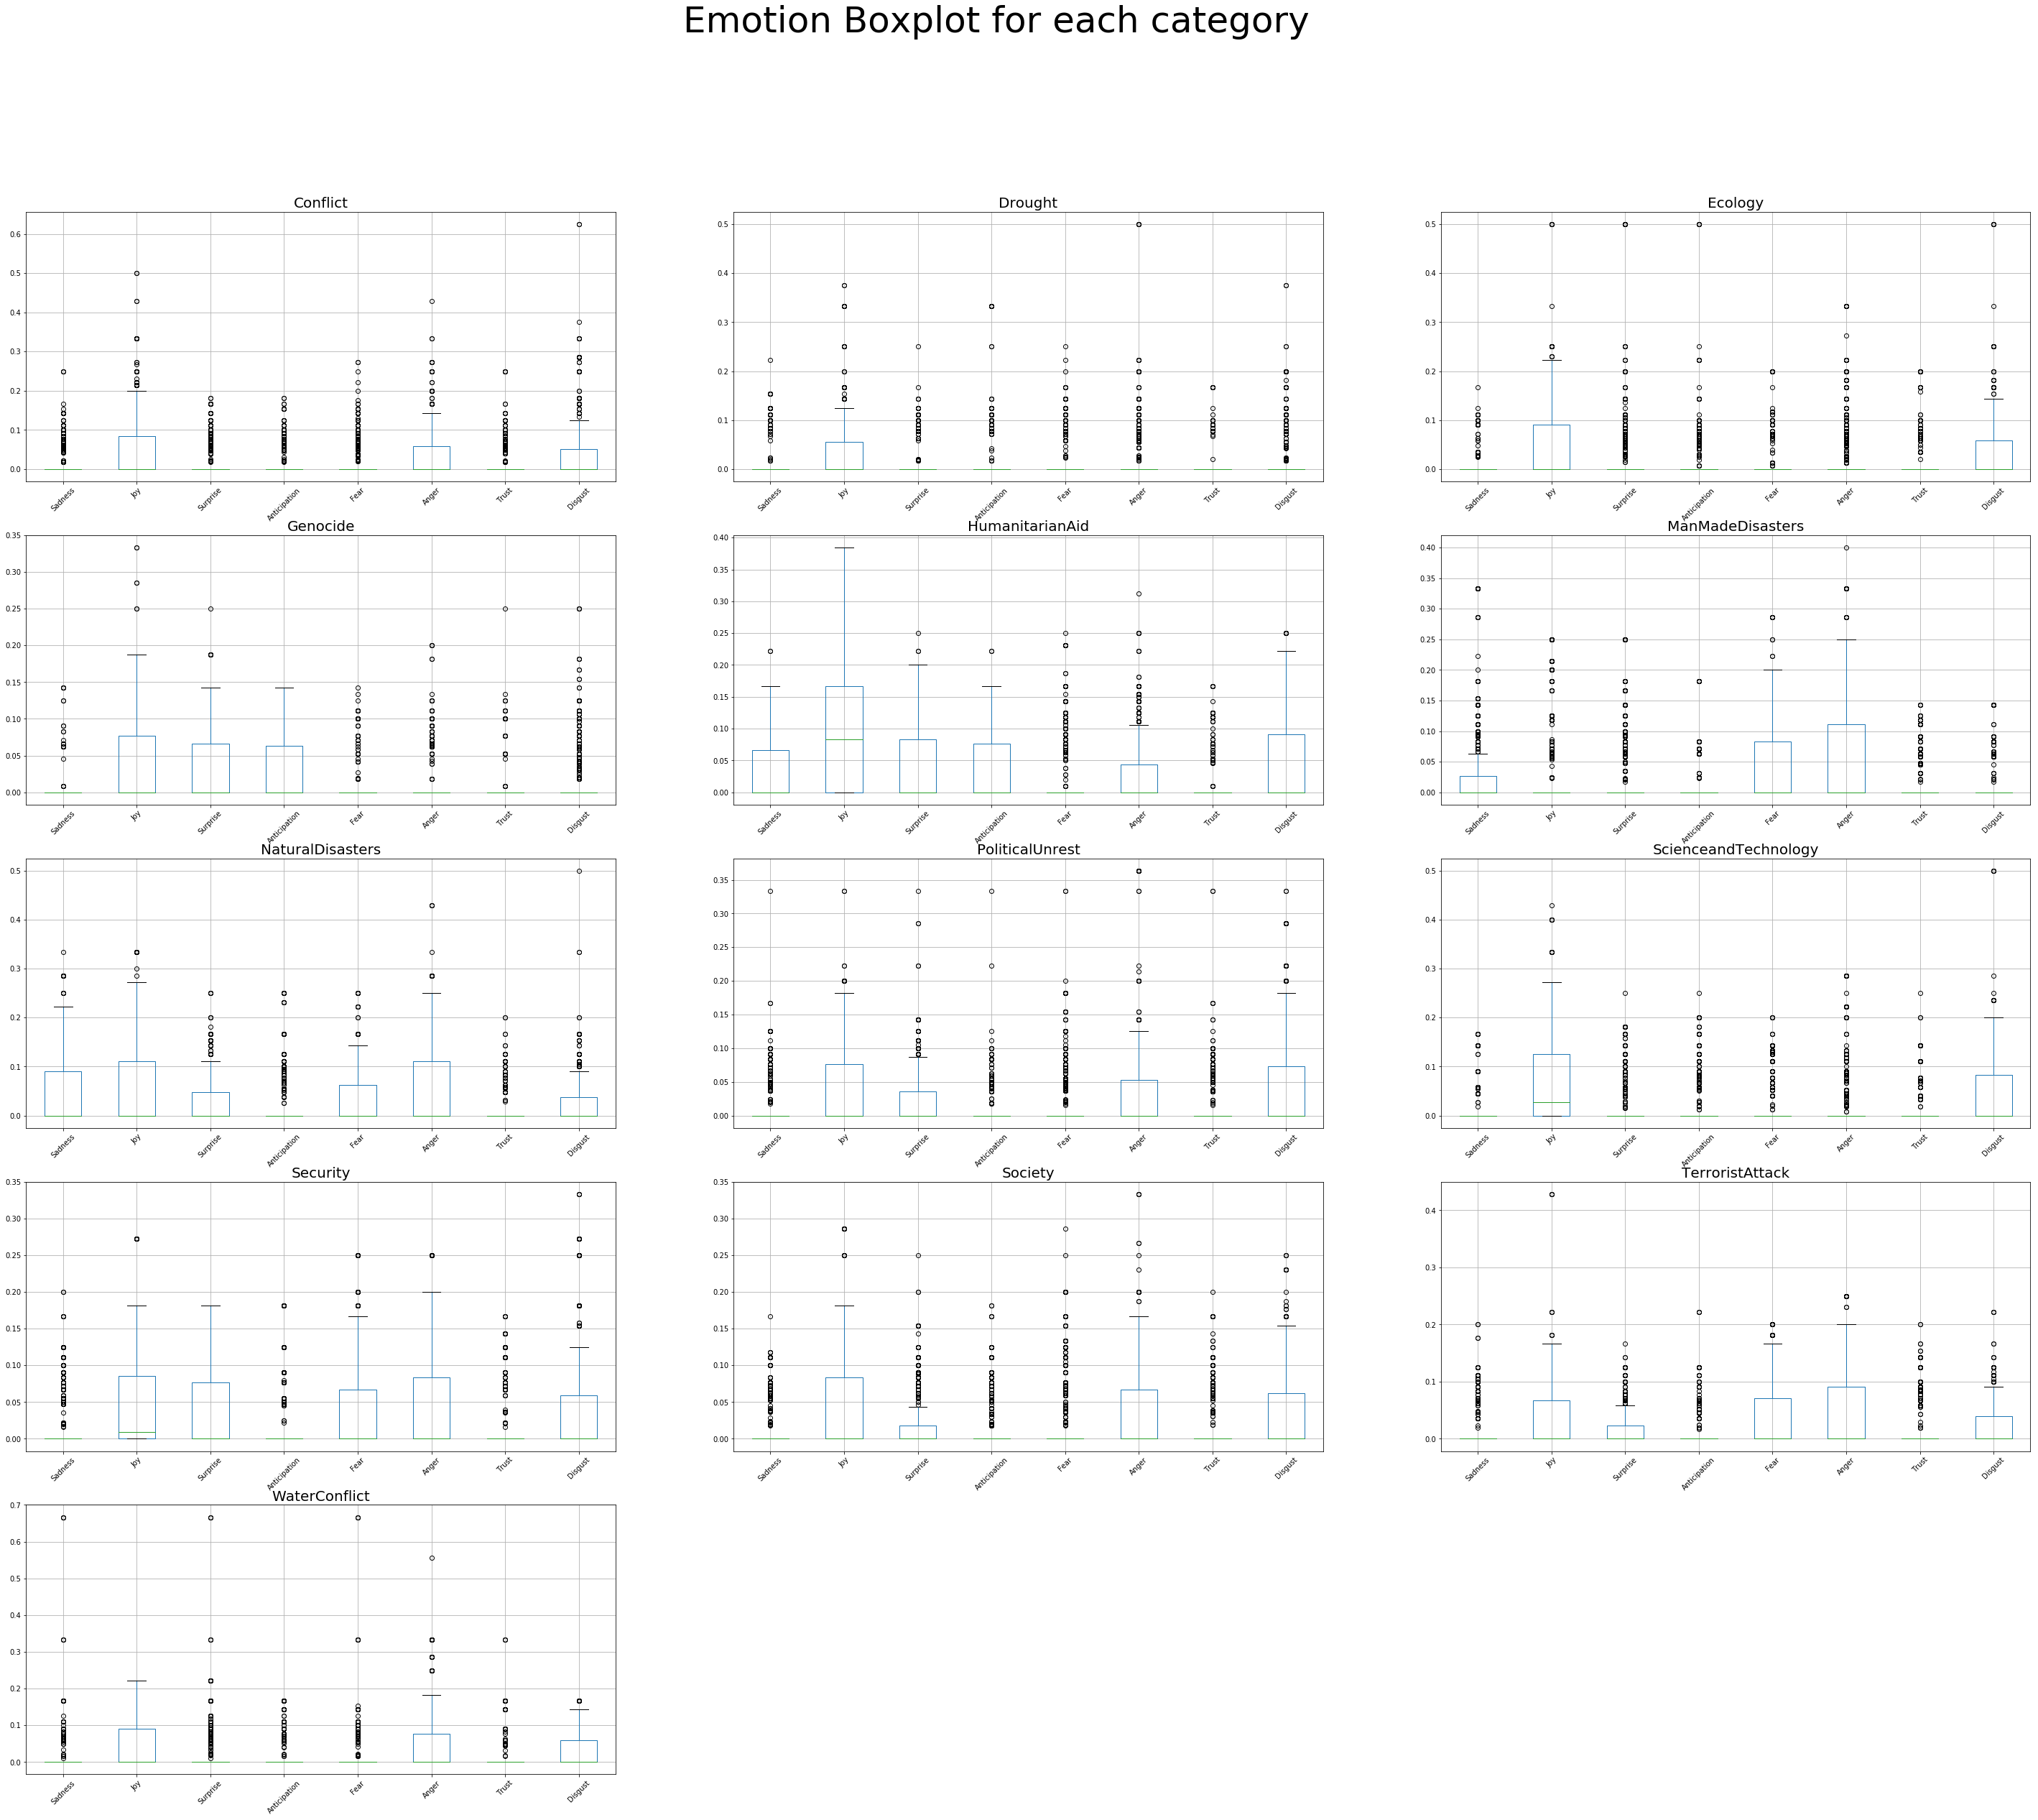

In [28]:
fig,axes=plt.subplots(5,3, figsize=(50, 40))
fig.suptitle("Emotion Boxplot for each category", fontsize = 50)
for k in range(13):
    panel[k][1].boxplot(ax = axes.flatten()[k], rot = 45)
    ax = axes.flatten()[k]
    ax.set_title(panel[k][0], fontsize = 20)

fig.delaxes(axes[4,1])
fig.delaxes(axes[4,2]) 
plt.show()

In [16]:
panel[1][1].describe()

,Sadness,Joy,Surprise,Anticipation,Fear,Anger,Trust,Disgust
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,0.009374,0.030681,0.012225,0.013843,0.013065,0.022445,0.003581,0.022522
std,0.030995,0.057147,0.033576,0.042398,0.035560,0.053329,0.019387,0.052260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.222222,0.375000,0.250000,0.333333,0.250000,0.500000,0.166667,0.375000


In [24]:
MIN_LENGTH = 10
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string

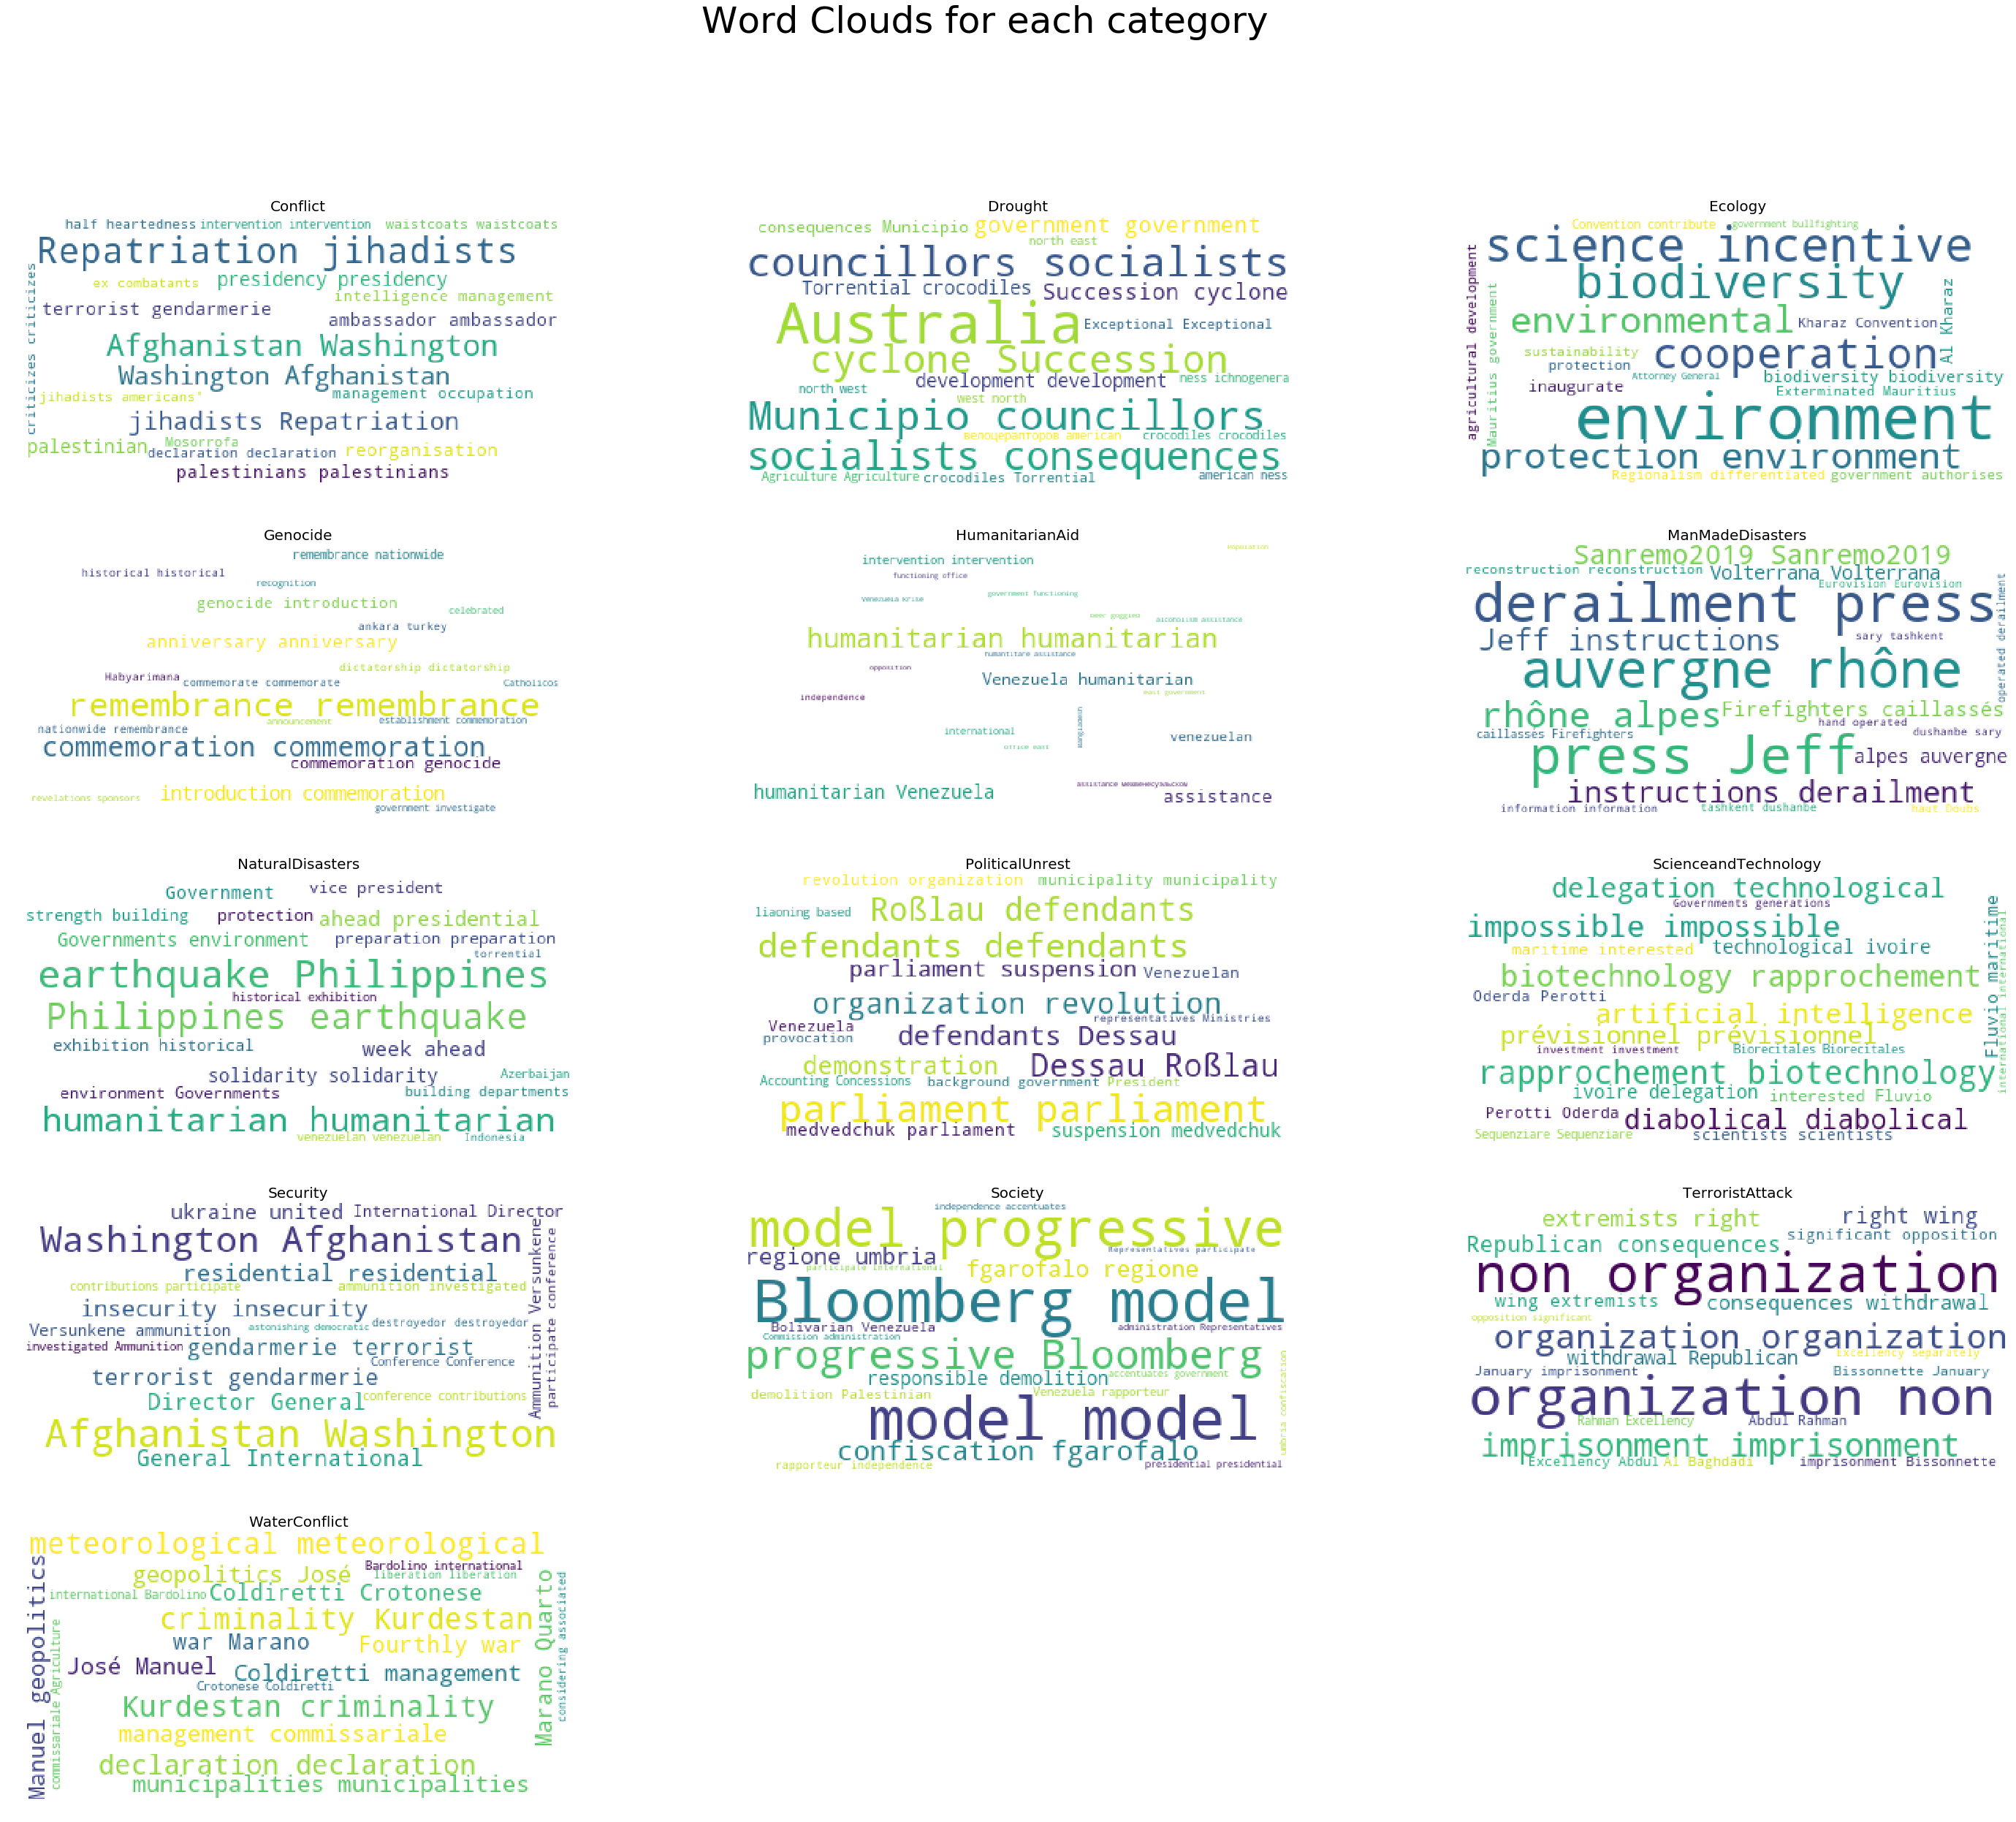

In [30]:
fig,axes=plt.subplots(5,3, figsize=(50, 40))
fig.suptitle("Word Clouds for each category", fontsize = 50)
for k in range(13):
    text = panel[k][1]['Translated Description'].str.cat(sep=' ')
    text = remove_short_words(text)
    ax = axes.flatten()[k]
    ax.set_title(panel[k][0], fontsize = 20)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.delaxes(axes[4,1])
fig.delaxes(axes[4,2]) 
plt.show()


### Apply to on watch

In [27]:
data = pd.read_csv('C://users/antoi/desktop/data_UN/on_watch/on_watch_03_08_sent_emot_full_text.csv')

In [29]:
data[['Sadness', 'Joy', 'Surprise', 'Anticipation', 'Fear', 'Negative', 'Anger', 'Trust', 'Positive', 'Disgust']] = data.apply(lambda x: emotion_analyzer(x['FULL_TEXT'],emotion_dict=emotion_dict),
                                                                                                   axis = 1, result_type = 'expand')
data.drop(['Positive', 'Negative'], axis=1, inplace = True)

In [30]:
data.to_csv('C://users/antoi/desktop/data_UN/on_watch/on_watch_03_08_sent_emot_full_text.csv',index=False)

In [24]:
data.drop(columns = 'Unnamed: 0',inplace = True)

In [31]:
data.head()

,ID,DATE,LINK,CATEGORY,LANGUAGE,DESCRIPTION,TITLE,TEXT,SOURCE,DESCRIPTION_2,...,Very Pos,Sadness,Joy,Surprise,Anticipation,Fear,Anger,Trust,Disgust,FULL_TEXT
0,2592,"March 8, 2019 12:00 AM",https://www.crisisgroup.org/middle-east-north-...,Conflict,English,Crisis Group Yemen Update #7. This is the seve...,Crisis Group Yemen Update #7,This is the seventh weekly briefing note as pa...,UNDP OnWatch,This is the seventh weekly briefing note as pa...,...,0.012354,0.008319,0.009651,0.026622,0.013311,0.035275,0.016972,0.035940,0.025624,Trendline: Putting Yemen to Work\r\n\r\nLate F...
1,2593,"March 8, 2019 12:00 AM",https://www.crisisgroup.org/latin-america-cari...,Governance,English,A Thaw or a Trap? Nicaragua’s Surprise Return ...,A Thaw or a Trap? Nicaragua’s Surprise Return ...,Nicaragua has launched a second round of natio...,UNDP OnWatch,Nicaragua has launched a second round of natio...,...,0.005079,0.004444,0.010370,0.024198,0.013827,0.034074,0.004938,0.043457,0.021728,"Tiziano Breda Researcher, Northern Triangle an..."
2,2594,"March 8, 2019 12:00 AM",https://www.crisisgroup.org/global/protecting-...,Other,English,Protecting Women’s Space in Politics. Women hu...,Protecting Women’s Space in Politics,Women human rights defenders around the globe ...,UNDP OnWatch,Women human rights defenders around the globe ...,...,0.012964,0.005676,0.028382,0.048250,0.033113,0.058657,0.009461,0.047304,0.020814,Isabelle Arradon Director of Research & Specia...
3,2595,"March 8, 2019 12:00 AM",https://www.crisisgroup.org/latin-america-cari...,Governance,English,Negotiating an Exit from Venezuela’s Bruising ...,Negotiating an Exit from Venezuela’s Bruising ...,The month-old struggle over Venezuela’s presid...,UNDP OnWatch,The month-old struggle over Venezuela’s presid...,...,0.008726,0.010497,0.013260,0.029834,0.013812,0.041436,0.010497,0.053039,0.029834,One month after Juan Guaidó staked claim to th...
4,2596,"March 8, 2019 12:00 AM",https://www.bbc.co.uk/news/amp/world-middle-ea...,Conflict,English,Syria war: Lawyers submit first war crimes cas...,Syria war: Lawyers submit first war crimes cas...,Human rights lawyers have filed the first case...,UNDP OnWatch,Human rights lawyers have filed the first case...,...,0.012418,0.005089,0.020356,0.035623,0.017812,0.043257,0.007634,0.030534,0.025445,Image copyright AFP Image caption Syrian Presi...
